# Chord Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt

In [3]:
#load all csv's with chords
songs = os.listdir('../data/metadata/chords/')

#organize all data into one df 
begin = []
end = []
chord = []
song_number = []
for i in range(len(songs)): 
    df = pd.read_csv('../data/metadata/chords/'+songs[i])
    try:
        begin.append(list(df['begin']))
        end.append(list(df['end']))
        chord.append(list(df['chord']))
        song_number.append([i]*len(df['begin']))
    except: 
        continue
begin = [item for sublist in begin for item in sublist]
end = [item for sublist in end for item in sublist]
chord = [item for sublist in chord for item in sublist]
song_number = [item for sublist in song_number for item in sublist]

In [5]:
df = pd.DataFrame({'begin':begin,
                    'end':end,
                    'chord':chord,
                    'song number':song_number})

In [6]:
df.head()

,begin,end,chord,song number
0,0.000000,0.432952,N,0
1,0.432952,1.950498,G,0
2,1.950498,3.471405,A:min,0
3,3.471405,5.038752,F,0
4,5.038752,6.582879,G,0


In [7]:
chord_counts = df.groupby('chord').count().sort_values(by='begin',ascending=False).drop(columns={'begin','song number'})

In [8]:
chord_counts = chord_counts['end']
chord_counts[:10]

chord
A        1568
G        1385
D        1353
E        1039
C         966
B         503
F         489
N         427
A:min     365
E:min     336
Name: end, dtype: int64

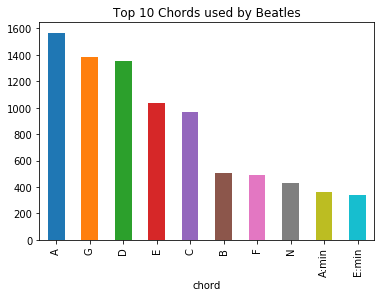

In [10]:
x = chord_counts[:10].plot(kind='bar',title='Top 10 Chords used by Beatles')

As we can see, the Beatles use primarily major chords in their music, which spike a positive & happy emotion, as opposed to minor chords, which are associated with sad emotions. 